In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)
!pip install certifi chardet click easydict h5py~=2.7 intel-openmp imgaug ipython ipython-genutils matplotlib==3.0.3 moviepy numpy==1.16.4 opencv-python~=3.4 pandas patsy 
!pip install python-dateutil pyyaml>=5.1 requests ruamel.yaml~=0.15 setuptools scikit-image scikit-learn scipy six statsmodels tables tensorpack>=0.9.7.1 tqdm wheel
%tensorflow_version 1.x
import numpy as np
import time
import sys
import os
import importlib

from IPython.display import HTML, display
def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

from google.colab import output
def alert_done():
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/b/bd/Bienenkorbglocke.1133.Hz.ogg").play()')

os.environ["DLClight"]="True"
%cd drive/My\ Drive/Development/DeepLabCut
import deeplabcut
from deadROMM import possumPolish

alert_done()

KeyboardInterrupt: ignored

In [ ]:
model.swapFeaturesHdf(self, hdf_path, swap: bool, cross: bool)

Finished extracting .pngs from 11Apr_diff.mp4


['./dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_black/11Apr_diff0089.png',
 './dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_black/11Apr_diff0221.png',
 './dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_black/11Apr_diff0280.png',
 './dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_black/11Apr_diff0347.png',
 './dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_black/11Apr_diff0434.png',
 './dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_black/11Apr_diff0551.png',
 './dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_black/11Apr_diff0717.png',
 './dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_black/11Apr_diff0725.png',
 './dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_black/11Apr_diff0755.png',
 './dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_black/11Apr_diff0790.png',
 './dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_black/11Apr_diff0828.png',

In [2]:
root = '/content/drive/My Drive/Development/DeepLabCut'

importlib.reload(possumPolish)
model = possumPolish.Project()

# config_path = model.load('./deadROMM/profiles-colab.yaml','dv92', './dev/demo_blank_dv92_biceps_3pec_delt/config.yaml') #92
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv101right', './dev/possum101right_biceps_triceps-Phil-2020-06-08/config.yaml') #101R
config_path = model.load('./deadROMM/profiles-colab.yaml','dv101left', './dev/possum101_11Apr-Phil-2020-04-13-diff/config.yaml') #101L
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv92', './dev/dv92_biceps_3pec_delt-Phil-2020-06-09/config.yaml') #92
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv85left', './dev/dv85_left_biceps_teres_lat-Phil-2020-06-09/config.yaml') #85L
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv85right', './dev/dv85_right_triceps_lat-Phil-2020-06-09/config.yaml') #85R
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv88left', './dev/dv88_left_teresmaj_pec-Phil-2020-06-09/config.yaml') #88L
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv88right', './dev/dv88_trilong_pec-Phil-2020-06-09/config.yaml') #88R
# config_path = model.load('./deadROMM/profiles-colab.yaml','sm105', './dev/sm105-Phil-2020-06-09/config.yaml') #105
# config_path = model.load('./deadROMM/profiles-colab.yaml','sm108', './dev/sm108-Phil-2020-06-09/config.yaml') #108
# config_path = model.load('./deadROMM/profiles-colab.yaml','sm126', './dev/sm126-Phil-2020-06-09/config.yaml') #126

# model.importXma(next(iter(model.config['history'].keys())))  #e.g. './dev/dv92_biceps...' no quotes
# model.dlc.create_training_dataset(model.yaml)

alert_done()

/content/drive/My Drive/Development/DeepLabCut/deadROMM/possumPolish.py:169: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  profiles = ruamel.yaml.load(open(self.profile_path))


Loaded profile dv101left
Generated absolute paths to project directories
Successfully loaded profile dv101left


In [ ]:
model.dlc.check_labels(model.yaml)

Creating images with labels by Phil.
/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff_labeled  already exists!
They are stored in the following folder: /content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff_labeled.
/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff_labeled  already exists!
They are stored in the following folder: /content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff_labeled.
If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


Increment iteration and retrain

In [3]:
trainposeconfigfile,testposeconfigfile,snapshotfolder=model.dlc.return_train_network_path(config_path,1,0.95)
cfg_dlc=model.dlc.auxiliaryfunctions.read_plainconfig(trainposeconfigfile)
cfg_dlc['augmentationprobability']=0.25
cfg_dlc['batch_size']=4
cfg_dlc['hist_eq']=True
cfg_dlc['gamma']=True
cfg_dlc['logcontrast']=True
cfg_dlc['allchannelsclahe']=True
# cfg_dlc['optimizer'] ="sgd"
cfg_dlc['dataset_type']='imgaug'
# cfg_dlc['multi_step']=[[1e-4, 7500], [5*1e-5, 12000], [1e-5, 50000], [5e-6, 200000]]
# cfg_dlc['global_scale']=1.0
cfg_dlc['scale_jitter_lo'] = 0.8
cfg_dlc['scale_jitter_up'] = 1.2
cfg_dlc['global_scale'] = 0.8
cfg_dlc['net_type']= 'resnet_50'


cfg_dlc['elastic_transform']=True
cfg_dlc['rotation']=180
cfg_dlc['covering']=True
cfg_dlc['motion_blur'] = True


# cfg_dlc['init_weights']= '/content/drive/My Drive/Development/DeepLabCut/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt'
# cfg_dlc['init_weights']= '/content/drive/My Drive/Development/DeepLabCut/deeplabcut/pose_estimation_tensorflow/models/pretrained/mobilenet_v2_1.0_224.ckpt'
# cfg_dlc['init_weights']=model.getLatestSnapshot(snapshotfolder) # to resume from latest snapshot
cfg_dlc['init_weights']= '/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-5/possum101_11AprApr13-trainset95shuffle1/train/snapshot-20000'

model.dlc.auxiliaryfunctions.write_plainconfig(trainposeconfigfile,cfg_dlc)
model.dlc.train_network(config_path, saveiters=10000,displayiters=50,maxiters=40000,max_snapshots_to_keep=15, allow_growth=True)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20],
                [21],
                [22],
                [23],
                [24],
                [25],
                [26],
                [27],
                [28],
                [29],
                [30],
                [31],
                [32],
                [33],
                [34],
                [35],
                [36],
                [37],
                [38],
                [39],
                [40],
                [41],
                [42],
                [43]],
 'all_joints_names': ['Body_ds1_c

Starting with imgaug pose-dataset loader.
Batch Size is 4
Initializing ResNet
Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
Loading already trained DLC with backbone: resnet_50

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-5/possum101_11AprApr13-trainset95shuffle1/train/snapshot-20000
Max_iters overwritten as 40000
Display_iters overwritten as 50
Save_iters overwritten as 10000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-5/

iteration: 50 loss: 0.0047 lr: 0.005
iteration: 100 loss: 0.0044 lr: 0.005
iteration: 150 loss: 0.0041 lr: 0.005
iteration: 200 loss: 0.0043 lr: 0.005
iteration: 250 loss: 0.0043 lr: 0.005
iteration: 300 loss: 0.0043 lr: 0.005
iteration: 350 loss: 0.0042 lr: 0.005
iteration: 400 loss: 0.0044 lr: 0.005
iteration: 450 loss: 0.0045 lr: 0.005
iteration: 500 loss: 0.0043 lr: 0.005
iteration: 550 loss: 0.0043 lr: 0.005
iteration: 600 loss: 0.0044 lr: 0.005
iteration: 650 loss: 0.0045 lr: 0.005
iteration: 700 loss: 0.0046 lr: 0.005
iteration: 750 loss: 0.0044 lr: 0.005
iteration: 800 loss: 0.0042 lr: 0.005
iteration: 850 loss: 0.0042 lr: 0.005
iteration: 900 loss: 0.0043 lr: 0.005
iteration: 950 loss: 0.0046 lr: 0.005
iteration: 1000 loss: 0.0045 lr: 0.005
iteration: 1050 loss: 0.0048 lr: 0.005
iteration: 1100 loss: 0.0043 lr: 0.005
iteration: 1150 loss: 0.0044 lr: 0.005
iteration: 1200 loss: 0.0041 lr: 0.005
iteration: 1250 loss: 0.0043 lr: 0.005
iteration: 1300 loss: 0.0044 lr: 0.005
iterat

The network is now trained and ready to evaluate. Use the function 'evaluate_network' to evaluate the network.


## Round 2: Import outliers and retrain

In [ ]:
# model.importXma('31Jul20_16h08m34s','./dev/possum101_11Apr-Phil-2020-04-13-diff/xma/outliers1.csv',outlier_mode=True)
# model.dlc.check_labels(model.yaml)

trainposeconfigfile,testposeconfigfile,snapshotfolder=model.dlc.return_train_network_path(config_path,1,0.95)
cfg_dlc=model.dlc.auxiliaryfunctions.read_plainconfig(trainposeconfigfile)
# cfg_dlc['augmentationprobability']=0.25
cfg_dlc['batch_size']=4
# cfg_dlc['hist_eq']=True
# cfg_dlc['gamma']=False
# cfg_dlc['logcontrast']=False
# cfg_dlc['allchannelsclahe']=True
cfg_dlc['optimizer'] ="sgd"
cfg_dlc['dataset_type']='imgaug'
# cfg_dlc['multi_step']=[[1e-4, 7500], [5*1e-5, 12000], [1e-5, 50000], [5e-6, 200000]]
# cfg_dlc['global_scale']=1.0
cfg_dlc['scale_jitter_lo'] = 1.0
cfg_dlc['scale_jitter_up'] = 1.0
cfg_dlc['global_scale'] = 1.0


# cfg_dlc['init_weights']= '/content/drive/My Drive/Development/DeepLabCut/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt'
# cfg_dlc['init_weights']=model.getLatestSnapshot(snapshotfolder) # to resume from latest snapshot

model.dlc.auxiliaryfunctions.write_plainconfig(trainposeconfigfile,cfg_dlc)


model.dlc.train_network(config_path, saveiters=10000,displayiters=50,maxiters=300000,max_snapshots_to_keep=15, allow_growth=True)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20],
                [21],
                [22],
                [23],
                [24],
                [25],
                [26],
                [27],
                [28],
                [29],
                [30],
                [31],
                [32],
                [33],
                [34],
                [35],
                [36],
                [37],
                [38],
                [39],
                [40],
                [41],
                [42],
                [43]],
 'all_joints_names': ['Body_ds1_c

Starting with imgaug pose-dataset loader.
Batch Size is 4
Initializing ResNet
Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
Loading ImageNet-pretrained resnet_50

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Development/DeepLabCut/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt
Max_iters overwritten as 300000
Display_iters overwritten as 50
Save_iters overwritten as 10000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-4/possum101_11AprApr13-trainset95shuffle1/train/snapshot', 'log_dir

iteration: 50 loss: 0.1876 lr: 0.005
iteration: 100 loss: 0.0265 lr: 0.005
iteration: 150 loss: 0.0276 lr: 0.005
iteration: 200 loss: 0.0267 lr: 0.005
iteration: 250 loss: 0.0285 lr: 0.005
iteration: 300 loss: 0.0274 lr: 0.005
iteration: 350 loss: 0.0267 lr: 0.005
iteration: 400 loss: 0.0248 lr: 0.005
iteration: 450 loss: 0.0263 lr: 0.005
iteration: 500 loss: 0.0260 lr: 0.005
iteration: 550 loss: 0.0233 lr: 0.005
iteration: 600 loss: 0.0222 lr: 0.005
iteration: 650 loss: 0.0245 lr: 0.005
iteration: 700 loss: 0.0262 lr: 0.005
iteration: 750 loss: 0.0250 lr: 0.005
iteration: 800 loss: 0.0229 lr: 0.005
iteration: 850 loss: 0.0226 lr: 0.005
iteration: 900 loss: 0.0229 lr: 0.005
iteration: 950 loss: 0.0249 lr: 0.005
iteration: 1000 loss: 0.0231 lr: 0.005
iteration: 1050 loss: 0.0205 lr: 0.005
iteration: 1100 loss: 0.0231 lr: 0.005
iteration: 1150 loss: 0.0233 lr: 0.005
iteration: 1200 loss: 0.0234 lr: 0.005
iteration: 1250 loss: 0.0220 lr: 0.005
iteration: 1300 loss: 0.0216 lr: 0.005
iterat

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-df25ed38d10b>", line 27, in <module>
    model.dlc.train_network(config_path, saveiters=10000,displayiters=50,maxiters=300000,max_snapshots_to_keep=15, allow_growth=True)
  File "/content/drive/My Drive/Development/DeepLabCut/deeplabcut/pose_estimation_tensorflow/training.py", line 134, in train_network
    raise e
  File "/content/drive/My Drive/Development/DeepLabCut/deeplabcut/pose_estimation_tensorflow/training.py", line 132, in train_network
    train(str(poseconfigfile),displayiters,saveiters,maxiters,max_to_keep=max_snapshots_to_keep,keepdeconvweights=keepdeconvweights,allow_growth=allow_growth) #pass on path and file name for pose_cfg.yaml!
  File "/content/drive/My Drive/Development/DeepLabCut/deeplabcut/pose_estimation_tensorflow/train.py", line 190, in train
 

KeyboardInterrupt: ignored

In [4]:
model.dlc.evaluate_network(config=model.yaml,Shuffles=[1], trainingsetindex=0,plotting=True,gputouse=0)


/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results/  already exists!


Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20],
                [21],
                [22],
                [23],
                [24],
                [25],
                [26],
                [27],
                [28],
                [29],
                [30],
                [31],
                [32],
                [33],
                [34],
                [35],
                [36],
                [37],
                [38],
                [39],
                [40],
                [41],
                [42],
                [43]],
 'all_joints_names': ['Body_ds1_c

/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results/iteration-5/possum101_11AprApr13-trainset95shuffle1  already exists!
Running  DLC_resnet50_possum101_11AprApr13shuffle1_40000  with # of trainingiterations: 40000
Initializing ResNet
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-5/possum101_11AprApr13-trainset95shuffle1/train/snapshot-40000


0it [00:00, ?it/s]

Analyzing data...


150it [00:14, 10.41it/s]
  0%|          | 0/150 [00:00<?, ?it/s]

Done and results stored for snapshot:  snapshot-40000
Results for 40000  training iterations: 95 1 train error: 3.23 pixels. Test error: 3.3  pixels.
With pcutoff of 0.1  train error: 3.23 pixels. Test error: 3.3 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 150/150 [02:41<00:00,  1.08s/it]

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)


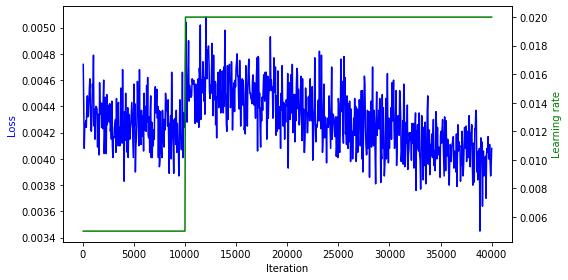

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20],
                [21],
                [22],
                [23],
                [24],
                [25],
                [26],
                [27],
                [28],
                [29],
                [30],
                [31],
                [32],
                [33],
                [34],
                [35],
                [36],
                [37],
                [38],
                [39],
                [40],
                [41],
                [42],
                [43]],
 'all_joints_names': ['Body_ds1_c

/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results/  already exists!
/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results/iteration-5/possum101_11AprApr13-trainset95shuffle1  already exists!
Running  DLC_resnet50_possum101_11AprApr13shuffle1_40000  with # of trainingiterations: 40000
This net has already been evaluated!


  0%|          | 0/150 [00:00<?, ?it/s]

Plotting...(attention scale might be inconsistent in comparison to when data was analyzed; i.e. if you used rescale)
/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results/iteration-5/possum101_11AprApr13-trainset95shuffle1/LabeledImages_DLC_resnet50_possum101_11AprApr13shuffle1_40000_snapshot-40000  already exists!


100%|██████████| 150/150 [02:41<00:00,  1.08s/it]
/content/drive/My Drive/Development/DeepLabCut/deadROMM/possumPolish.py:282: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  self.config = ruamel.yaml.load(open(self.yaml))


Function <function evaluate_network at 0x7fa61fdd5400> created 0 new files in directory ./dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results
Updated config.yaml with event evaluation at 15Sep20_22h15m26s


Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20],
                [21],
                [22],
                [23],
                [24],
                [25],
                [26],
                [27],
                [28],
                [29],
                [30],
                [31],
                [32],
                [33],
                [34],
                [35],
                [36],
                [37],
                [38],
                [39],
                [40],
                [41],
                [42],
                [43]],
 'all_joints_names': ['Body_ds1_c

Using snapshot-40000 for model /content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-5/possum101_11AprApr13-trainset95shuffle1

Initializing ResNet




INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-5/possum101_11AprApr13-trainset95shuffle1/train/snapshot-40000
Starting to analyze %  ./videos/11Apr_diff.mp4
Loading  ./videos/11Apr_diff.mp4


  0%|          | 0/7904 [00:00<?, ?it/s]

Duration of video [s]:  263.47 , recorded with  30.0 fps!
Overall # of frames:  7904  found with (before cropping) frame dimensions:  1024 1024
Starting to extract posture


7979it [03:51, 34.45it/s]

Detected frames:  7904
Saving results in videos...
Saving csv poses!


The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!
Function <function analyze_videos at 0x7fa61fdd56a8> created 3 new files in directory ./videos
Updated config.yaml with event analysis at 15Sep20_22h18m17s


In [6]:
model.evaluateAndAnalyze()
# model.getOutliers(20, outlier_algo='jump') 
alert_done()

In [7]:
model.filterPredictions('./videos/11Apr_diffDLC_resnet50_possum101_11AprApr13shuffle1_40000.h5',model.config['history']['04Aug20_21h12m49s']['files'],'aug_allaug_diff3')

/content/drive/My Drive/Development/DeepLabCut/deadROMM/possumPolish.py:282: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  self.config = ruamel.yaml.load(open(self.yaml))


Updated config.yaml with event filterPredictions_aug_allaug_diff3 at 15Sep20_22h29m27s
Successfully filtered model predictions; saved ./dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff/FilteredMachineLabels_15Sep20_22h29m27s.h5
Updated config.yaml with event splitDlc2Xma at 15Sep20_22h29m28s
Successfully split DLC format to XMALab 2D points; saved ./dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff/FilteredMachineLabels_15Sep20_22h29m27s_split_15Sep20_22h29m28s.csv


In [ ]:
model.config['history']['04Aug20_21h12m49s']

{'files': ['./dev/possum101_11Apr-Phil-2020-04-13-diff/frames-for-xmalab/c1_11Apr_outlier_04Aug20_21h12m49s/img0280.png',
  './dev/possum101_11Apr-Phil-2020-04-13-diff/frames-for-xmalab/c1_11Apr_outlier_04Aug20_21h12m49s/img0974.png',
  './dev/possum101_11Apr-Phil-2020-04-13-diff/frames-for-xmalab/c1_11Apr_outlier_04Aug20_21h12m49s/img1070.png',
  './dev/possum101_11Apr-Phil-2020-04-13-diff/frames-for-xmalab/c1_11Apr_outlier_04Aug20_21h12m49s/img1203.png',
  './dev/possum101_11Apr-Phil-2020-04-13-diff/frames-for-xmalab/c1_11Apr_outlier_04Aug20_21h12m49s/img1217.png',
  './dev/possum101_11Apr-Phil-2020-04-13-diff/frames-for-xmalab/c1_11Apr_outlier_04Aug20_21h12m49s/img1252.png',
  './dev/possum101_11Apr-Phil-2020-04-13-diff/frames-for-xmalab/c1_11Apr_outlier_04Aug20_21h12m49s/img1311.png',
  './dev/possum101_11Apr-Phil-2020-04-13-diff/frames-for-xmalab/c1_11Apr_outlier_04Aug20_21h12m49s/img1434.png',
  './dev/possum101_11Apr-Phil-2020-04-13-diff/frames-for-xmalab/c1_11Apr_outlier_04Aug2

In [ ]:
model.config['history']

{'04Aug20_03h01m21s': {'files': ['./dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff/MachineLabelsRefine_04Aug20_03h01m19s.h5',
   './dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff/MachineLabelsRefine_04Aug20_03h01m19s.csv'],
  'operation': 'spliceXma2Dlc'},
 '04Aug20_20h54m26s': {'files': ['./dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results/iteration-4/possum101_11AprApr13-trainset95shuffle1/LabeledImages_DLC_resnet50_possum101_11AprApr13shuffle1_150000_snapshot-150000/Training-11Apr_diff-img0221.png',
   './dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results/iteration-4/possum101_11AprApr13-trainset95shuffle1/LabeledImages_DLC_resnet50_possum101_11AprApr13shuffle1_150000_snapshot-150000/Training-11Apr_diff-img4317.png',
   './dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results/iteration-4/possum101_11AprApr13-trainset95shuffle1/LabeledImages_DLC_resnet50_possum101_11AprApr13shuffle1_150000_snapshot-150000/Training-11Apr_dif

In [ ]:
model.dlc.check_labels(model.yaml)
alert_done()

Creating images with labels by Phil.
/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff_labeled  already exists!
They are stored in the following folder: /content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff_labeled.
If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


In [ ]:
model.dlc.create_labeled_video(config_path,['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4'])

Starting %  /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos ['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4']
Loading  /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4 and data.


  0%|          | 13/7904 [00:00<01:05, 120.12it/s]

7904
Duration of video [s]:  263.47 , recorded with  30.0 fps!
Overall # of frames:  7904 with cropped frame dimensions:  1024 1024
Generating frames and creating video.


100%|██████████| 7904/7904 [02:13<00:00, 59.14it/s]


In [ ]:

model.dlc.filterpredictions(config_path,['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4'], filtertype="spline",windowlength=17)
model.dlc.create_labeled_video(config_path,['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4'],filtered=True)


4it [00:00, 39.50it/s]

Filtering with spline model /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4


44it [00:01, 38.13it/s]


Saving filtered csv poses!


  0%|          | 0/7904 [00:00<?, ?it/s]

Starting %  /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos ['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4']
Loading  /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4 and data.
7904
Duration of video [s]:  263.47 , recorded with  30.0 fps!
Overall # of frames:  7904 with cropped frame dimensions:  1024 1024
Generating frames and creating video.


100%|██████████| 7904/7904 [02:16<00:00, 57.86it/s]


In [ ]:
model.dlc.create_training_dataset(model.yaml,windows2linux=True)

/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/training-datasets/iteration-3/UnaugmentedDataSet_possum101_11AprApr13  already exists!
Annotation data converted to unix format...
/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-3/possum101_11AprApr13-trainset95shuffle1  already exists!
/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-3/possum101_11AprApr13-trainset95shuffle1/train  already exists!
/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-3/possum101_11AprApr13-trainset95shuffle1/test  already exists!
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([57, 62, 69, 32, 70,  1, 35, 29,  6, 66, 48, 79, 22, 44, 40, 36, 21,
           7, 10,  5, 43, 63,  8, 31, 55, 38, 33, 65, 41,  2, 73, 50, 24, 77,
          52, 53, 16, 64, 78, 67, 30, 72,  9, 71, 47, 75, 59, 23, 37, 19, 15,
          25, 76, 58, 20, 42, 14, 68, 74, 39, 49, 12, 56,  0, 46,  4, 27, 60,
          26, 34, 13, 54, 51, 45, 11, 28]), array([ 3, 17, 18, 61])))]

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon May 25 22:14:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    34W / 250W |  15767MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  